In [1]:
# Machine Learning Algorithm for Student Marks Prediction

In [2]:
#import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read the data set
data=pd.read_csv(r"C:\Users\Ravi Prakash Yadav\Desktop\Projects\Student Mark Prediction\MarkPrediction_ML\student_info.csv")
data_org=data

In [4]:
data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
data.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [7]:
mark_mean=np.mean(data['student_marks'])

In [8]:
mark_mean

77.93375

In [9]:
hour_mean=np.mean(data['study_hours'])

In [10]:
hour_mean

6.9959487179487185

In [11]:
data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [12]:
data=data.fillna(hour_mean,axis=0)

In [13]:
data.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


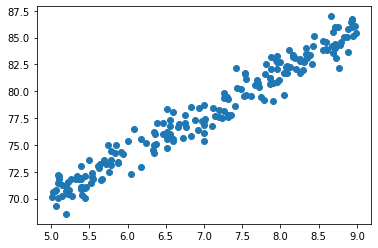

In [14]:
#visualising trends
plt.scatter(x=data.study_hours,y=data.student_marks)

In [22]:
#split the data into dependent and independent variable
X=data.drop("student_marks",axis=1)
y=data.drop("study_hours",axis=1)

In [27]:
#splitting the data into training and testing phase
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [47]:
print("Xtrain:",X_train.shape)
print("Xtest:",X_test.shape)
print("ytrain:",y_train.shape)
print("ytest:",y_test.shape)

Xtrain: (160, 1)
Xtest: (40, 1)
ytrain: (160, 1)
ytest: (40, 1)


In [49]:
#fitting model to simple linear model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [52]:
y_pred=regressor.predict(X_test)

In [59]:
y_pred
y_pred=pd.DataFrame(y_pred)
y_pred.head()

,0
0,83.505073
1,70.849272
2,72.932370
3,85.352348
4,73.207496


In [58]:
y_test.head()

,student_marks
18,82.50
170,71.18
107,73.25
98,83.64
177,73.64


In [67]:
regressor.predict([[12.5]]).round(2)

c:\Users\Ravi Prakash Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[99.58]])

In [69]:
pred_data=pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=['hour study','orignal_marks','predicted_marks'])

In [71]:
pred_data.head()

,hour study,orignal_marks,predicted_marks
0,8.41,82.50,83.505073
1,5.19,71.18,70.849272
2,5.72,73.25,72.932370
3,8.88,83.64,85.352348
4,5.79,73.64,73.207496


In [74]:
#model fine tunning
regressor.score(X_test,y_test)

0.9521841793508594

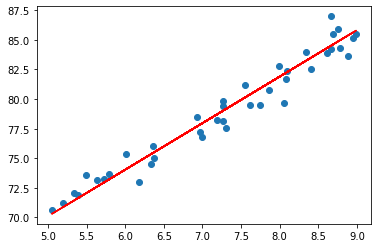

In [79]:
plt.scatter(x=X_test,y=y_test)
plt.plot(X_test,y_pred ,c='red')

Saving ML Model

In [81]:
import joblib

In [85]:
joblib.dump(value=regressor,filename='student_mark_prediction.pkl')#pickling

['student_mark_prediction.pkl']

In [87]:
model=joblib.load(filename='student_mark_prediction.pkl')

In [88]:
model.predict([[12.5]])

c:\Users\Ravi Prakash Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[99.58029802]])